<a href="https://colab.research.google.com/github/DigDataSteve/Coursera_Course_Analysis_Project/blob/main/Coursera_Course_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coursera Course Analysis Project
## This project will perform exploratory data analysis on the dataset (link down below) and be preceeded by data cleansing.
### The project will identify any missing values, any outliers, any trends in the data, look for patterns, and answer questions such as what courses are the most popular, what courses are the least popular, are difficult courses as popular as courses that are not so difficult, along with other questions. 

The dataset can be found [here](https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset).

In [ ]:
"""Connect the dataset to Google Colab"""
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
"""Import libraries and connect to the data and store the data into a dataframe called 'courses'"""
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

courses = pd.read_csv('/content/gdrive/MyDrive/Turing/Module1/Sprint3/Sprint_Project_3/Data/coursea_data.csv', index_col=False)
courses.head(3)

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k


## Number of rows and number of columns along with data types.

In [ ]:
c = courses.shape
print(f'The number of rows are: {c[0]}, the number of columns are: {c[1]}')

The number of rows are: 891, the number of columns are: 7


# Display data types

In [ ]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


# Display dataset features, i.e. columns

In [ ]:
for c in courses.columns:
  print(c)

Unnamed: 0
course_title
course_organization
course_Certificate_type
course_rating
course_difficulty
course_students_enrolled


# Rename three columns and check for correctness

In [ ]:
courses.rename(columns={'Unnamed: 0': 'course_ID', 'course_Certificate_type':'course_cert_type', 'course_students_enrolled':'course_enrollment'}, inplace=True)
"""Loop through column names and print them out"""
for c in courses.columns:
  print(c)

course_ID
course_title
course_organization
course_cert_type
course_rating
course_difficulty
course_enrollment


# Check for missing values and duplicate rows

In [ ]:
courses.isnull().sum()

course_ID              0
course_title           0
course_organization    0
course_cert_type       0
course_rating          0
course_difficulty      0
course_enrollment      0
dtype: int64

In [ ]:
courses.isnull().values.any()

False

In [ ]:
courses.isna().any()

course_ID              False
course_title           False
course_organization    False
course_cert_type       False
course_rating          False
course_difficulty      False
course_enrollment      False
dtype: bool

In [ ]:
"""Checking for duplicate rows."""
courses.duplicated().sum()
# no duplicates found

0

# Start the Exploratory Data Analysis

## How many organizations have courses?

In [ ]:
num = courses.course_organization.unique().size
print(f'{num} organizations have courses.')

154 organizations have courses.


## What organization has the highest number of courses?

In [ ]:
result = courses.course_organization.value_counts()[courses.course_organization.unique()] \
.sort_values(ascending=False) \
.head(1)

for i, v in result.items():
  print(f'Organization name: {i}\n Number of courses: {v}')


Organization name: University of Pennsylvania
 Number of courses: 59


## What are the top ten organizations that have the highest number of courses?

In [ ]:
num = courses.groupby(by=courses.course_organization).count() \
.sort_values(by='course_ID', ascending=False)

num.loc[:,['course_ID']].head(10)

,course_ID
course_organization,
University of Pennsylvania,59
University of Michigan,41
Google Cloud,34
Duke University,28
Johns Hopkins University,28
"University of California, Irvine",27
University of Illinois at Urbana-Champaign,22
IBM,22
"University of California, Davis",21


## Visualize the the top ten organizations that have the highest number of courses.

In [ ]:
r = num.head(10)
fig = px.histogram(r, x=r.index, y='course_enrollment', template='plotly_dark')
fig.update_layout(
  title="Top-10 Organizations that have the Highest Number of Courses",
  xaxis_title="Organizaiton",
  bargap=0.1,
  yaxis_title="Number of Courses",
  title_font_size=24,
  title_x=0.5
)
fig.show()

## What is is average number of courses per organizaiton?


In [ ]:
avg = courses.groupby(by='course_organization').count().mean()
print(f'The average number of courses per organization is {avg[0].round(2)}.')

The average number of courses per organization is 5.79.


## What is the overall course rating average?

In [ ]:
avg = courses['course_rating'].mean()
print(f'The overall average rating of all courses is {avg.round(2)}')

The overall average rating of all courses is 4.68


## What are the top organizations with the highest average rating for their courses?
#### Pass in a value for how many courses an organization must have to view the average rating.

In [ ]:
"""First group the organizations into their own bucket"""
c = courses.groupby('course_organization')

"""Function, rating_avg, takes in the number of ratings that an organization has and displays the 'x' orgs with the 
highest average course rating. This is to show what orgs have the most ratings and have the highest rating and 
give weight to those orgs that produce the most content."""

"""Call the function, rating_avg, with an argument. That argument is the number of courses that an org has to have.
The function then returns the average for the number of courses that it has produced."""

def rating_avg(num):
  r = c.filter(lambda x: x['course_rating'].count() > num)

  return r.groupby('course_organization')['course_rating'] \
  .agg(['mean', 'count']) \
  .sort_values(by='count', ascending=False)


"""This example shows the averaage rating for orgs that have more than 10 courses."""
print(rating_avg(20))

                                                mean  count
course_organization                                        
University of Pennsylvania                  4.696610     59
University of Michigan                      4.729268     41
Google Cloud                                4.582353     34
Duke University                             4.664286     28
Johns Hopkins University                    4.660714     28
University of California, Irvine            4.596296     27
IBM                                         4.613636     22
University of Illinois at Urbana-Champaign  4.654545     22
University of California, Davis             4.619048     21


# Change the 'course_enrollment' column data type from string to float.
#### Must replace 'k' with thousands and 'm' with millions.

In [ ]:
"""Function takes in 'course_enrollment' string and outputs float."""
"""Can only run once on the dataframe as it permanately changes the data."""

def convert(x):

  if 'k' in x:
    return float(x.replace('k', '')) * 1000
  
  if 'm' in x:
    return float(x.replace('m', '')) * 1000000
    

courses.course_enrollment = courses.course_enrollment.apply(convert)

# What are the top ten courses with the highest enrollment?

In [ ]:
courses.loc[:, ['course_title', 'course_enrollment', 'course_organization']] \
.sort_values(by='course_enrollment', ascending=False) \
.head(10)

,course_title,course_enrollment,course_organization
564,Machine Learning,3200000.0,Stanford University
815,The Science of Well-Being,2500000.0,Yale University
688,Python for Everybody,1500000.0,University of Michigan
674,Programming for Everybody (Getting Started wit...,1300000.0,University of Michigan
196,Data Science,830000.0,Johns Hopkins University
129,Career Success,790000.0,"University of California, Irvine"
261,English for Career Development,760000.0,University of Pennsylvania
765,Successful Negotiation: Essential Strategies a...,750000.0,University of Michigan
199,Data Science: Foundations using R,740000.0,Johns Hopkins University
211,Deep Learning,690000.0,deeplearning.ai


# What is the average enrollment per course for all courses?

In [ ]:
avgenroll = courses.course_enrollment.mean().round(2)
print(f'The overall average enrollment for courses is: {avgenroll} students.')

The overall average enrollment for courses is: 90552.08 students.


# What are the top ten organizations in terms of the highest total enrollment?

In [ ]:
r = courses.groupby('course_organization')['course_enrollment'].sum().sort_values(ascending=False).head(10)
print(f'The top ten orgs for the highest enrollments are: \n\n{r}')

The top ten orgs for the highest enrollments are: 

course_organization
University of Michigan              7437700.0
University of Pennsylvania          5501300.0
Stanford University                 4854000.0
University of California, Irvine    4326000.0
Johns Hopkins University            4298900.0
Duke University                     3967600.0
Yale University                     3952000.0
IBM                                 2956400.0
deeplearning.ai                     2863400.0
Google Cloud                        2604300.0
Name: course_enrollment, dtype: float64


# What are the total number of courses for each difficulty category?

In [ ]:
r = courses.groupby(by='course_difficulty').size().sort_values(ascending=False)
print(f'The total number of courses per difficulty level are: \n\n {r}')

The total number of courses per difficulty level are: 

 course_difficulty
Beginner        487
Intermediate    198
Mixed           187
Advanced         19
dtype: int64


# What is the student enrollment for each difficulty level?



In [ ]:
r = courses.groupby('course_difficulty')['course_enrollment'].sum().sort_values(ascending=False)
print(f'The enrollment per difficulty level: \n\n {r.to_frame()}')

The enrollment per difficulty level: 

                    course_enrollment
course_difficulty                   
Beginner                  39921800.0
Mixed                     24989400.0
Intermediate              14506300.0
Advanced                   1264400.0


# Visualize the student enrollment for each difficulty level.

In [ ]:
"""Use plotly express to create a histogram."""
fig = px.histogram(courses, x = 'course_difficulty', y = 'course_enrollment', \
                   width=700, height=500, template='plotly_dark')

"""Add more information to histogram chart and change theme."""
fig.update_layout(
  title="Student Enrollment for Each Difficulty Level",
  xaxis_title="Difficulty Level",
  bargap=0.1,
  yaxis_title="Total Enrollment",
  title_font_size=24,
  title_x=0.5
)

fig.show()

# What courses have the most enrollment for each difficulty level?

In [ ]:
"""Use .loc property to return only the necessry columns."""
r = courses.loc[:, ['course_title', 'course_difficulty', 'course_enrollment']]

"""First sort the values by difficulty level then the course enrollmnet, then group the rows by the difficulty level"""
r = r.sort_values(['course_difficulty', 'course_enrollment'], ascending=False) \
.groupby('course_difficulty')

"""Return only the first row of each group. Need to rearrange the titles so the difficulty level is the first column."""
r.head(1)[['course_difficulty', 'course_title', 'course_enrollment']]

,course_difficulty,course_title,course_enrollment
564,Mixed,Machine Learning,3200000.0
211,Intermediate,Deep Learning,690000.0
688,Beginner,Python for Everybody,1500000.0
27,Advanced,Advanced Data Science with IBM,320000.0


# Function that allows user to see a specific number of courses that have the most enrollment for each difficulty level.
### User of the function can choose between 1 and 10 courses listed for each difficulty level.

In [ ]:
from numba.core.types.misc import NoneType
"""User supplies dataframe and the number of courses to list. That number must be between 1 and 10."""
def difficulty_enrollment_titles(dfg, num):
  if num < 1 or num > 10:
    return 'Enter number between 1 and 10.'
  else:
    dfg = dfg.loc[:, ['course_difficulty', 'course_title', 'course_enrollment']]
    dfg = dfg.sort_values(by=['course_difficulty', 'course_enrollment'], ascending=False).groupby(by='course_difficulty')
    print('Here are the enrollments along with associated course titles for each difficulty level: ')
    return dfg.head(num)

result = difficulty_enrollment_titles(courses, 1)
display(result)

Here are the enrollments along with associated course titles for each difficulty level: 


,course_difficulty,course_title,course_enrollment
564,Mixed,Machine Learning,3200000.0
211,Intermediate,Deep Learning,690000.0
688,Beginner,Python for Everybody,1500000.0
27,Advanced,Advanced Data Science with IBM,320000.0


# What is the Average Rating for Each Difficulty Level?

In [ ]:
r = courses.loc[:, ['course_difficulty', 'course_rating']]
r.groupby(by='course_difficulty').agg('mean', 'count').sort_values(by='course_rating', ascending=False)

,course_rating
course_difficulty,
Mixed,4.708556
Beginner,4.680903
Intermediate,4.646465
Advanced,4.600000


# Analyze the Most Common Words in the Title of Courses
### Use a word cloud but first remove 'stop words' such as 'it', 'the', 'a', et cetera.
### Use regular expressions to remove non-words such as ':', ',', etc.

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud,STOPWORDS
import re
stop_words = set(STOPWORDS)

title_words = ' '.join(courses.course_title)

"""Replace non-words with space."""
title_words = re.sub('[^a-zA-Z]', ' ', title_words)

"""Replace extra space with just one space."""
title_words = re.sub(' +', ' ', title_words)
print(title_words)

 ISC Systems Security Certified Practitioner SSCP A Crash Course in Causality Inferring Causal Effects from Observational Data A Crash Course in Data Science A Law Student s Toolkit A Life of Happiness and Fulfillment ADHD Everyday Strategies for Elementary Students AI For Everyone AI For Medical Treatment AI Foundations for Everyone AI for Medical Diagnosis AI for Medical Prognosis AI for Medicine AWS Fundamentals AWS Fundamentals Addressing Security Risk AWS Fundamentals Building Serverless Applications AWS Fundamentals Going Cloud Native AWS Fundamentals Migrating to the Cloud Aboriginal Worldviews and Education Academic English Writing Accelerated Computer Science Fundamentals Access Controls Accounting Analytics Accounting for Decision Making Achieving Personal and Professional Success Actualizaci n en el manejo del paciente con diabetes mellitus tipo Addiction Treatment Clinical Skills for Healthcare Providers Advanced Business Analytics Advanced Data Science with IBM Advanced Ma

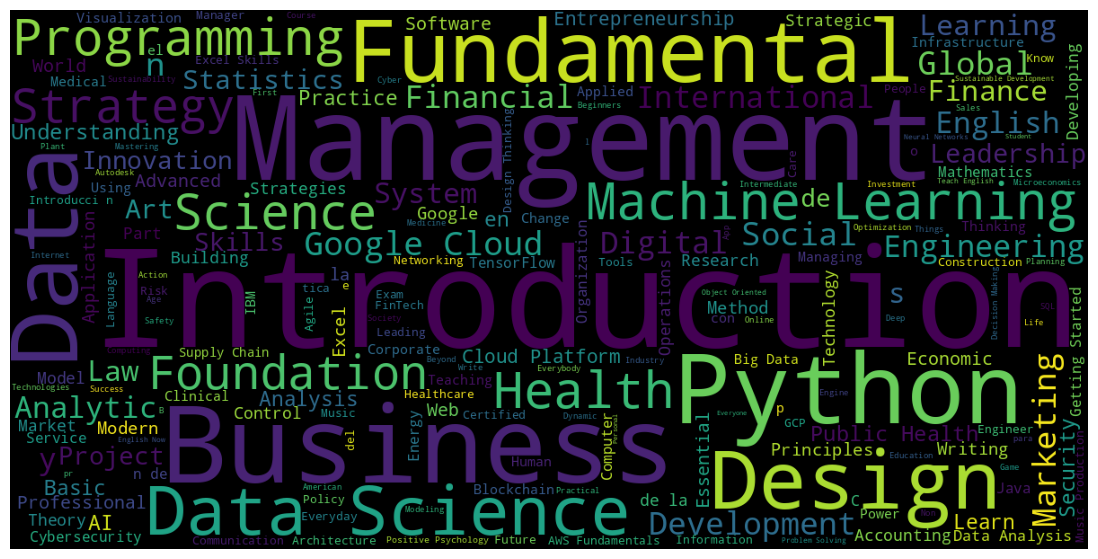

In [ ]:
"""Create the word cloud."""
cloud = WordCloud(width=1200, height=600, stopwords=stop_words).generate(title_words)
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(cloud)

# What are the Most Common Words in the Course Titles'?

In [ ]:
"""Join every word in the course title column, speparated by spaces."""
key_words = ' '.join(courses.course_title)

"""Replace non-words with space."""
key_words = re.sub('[^a-zA-Z]', ' ', title_words)

"""Replace extra space with just one space."""
key_words = re.sub(' +', ' ', title_words)

In [ ]:
"""Install the Natural Language Toolkit."""
!python3 -m pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('corpus')
from nltk.tokenize import word_tokenize

"""Place the words in a list for processing."""
divided_words = word_tokenize(key_words)

good_words = [word for word in divided_words if not word in stopwords.words()]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading corpus: Package 'corpus' not found in index


# What are the top 10 Key Words that Appear in Course Titles?

In [ ]:
df = pd.DataFrame(good_words, columns=['Key Words']).value_counts()
print(f'The top 10 key words that appear in course titles are: \n\n{df.head(10)}')

The top 10 key words that appear in course titles are: 

Key Words   
Introduction    75
Data            71
Management      53
The             47
Science         43
Business        41
Learning        39
Python          35
Health          34
Fundamentals    32
dtype: int64


# What Key Words Appear the Most in the Top Ten Courses with the Highest Enrollment?

In [ ]:
"""Top Ten Courses with Highest Enrollment."""
top = courses.loc[:,{'course_title', 'course_enrollment'}] \
.sort_values(by='course_enrollment', ascending=False) \
.head(10)
top

<ipython-input-35-9ef332eeae16>:2: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



,course_enrollment,course_title
564,3200000.0,Machine Learning
815,2500000.0,The Science of Well-Being
688,1500000.0,Python for Everybody
674,1300000.0,Programming for Everybody (Getting Started wit...
196,830000.0,Data Science
129,790000.0,Career Success
261,760000.0,English for Career Development
765,750000.0,Successful Negotiation: Essential Strategies a...
199,740000.0,Data Science: Foundations using R
211,690000.0,Deep Learning


# Visualize the Top-Ten Courses with the Highest Enrollment

In [ ]:
tenfig = px.histogram(top, x = 'course_title', y = 'course_enrollment', \
                   width=1200, height=900, template='plotly_dark')

"""Add more information to histogram chart and change theme."""
tenfig.update_layout(
  title="Top-Ten Courses with the Highest Enrollment",
  xaxis_title="Course Title",
  bargap=0.1,
  yaxis_title="Total Enrollment",
  title_font_size=24,
  title_x=0.5
)

tenfig.show()